In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/heart_v2 (2).csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [5]:
from re import X
# Assigning the variable to X and y
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [6]:
print(X.shape, y.shape)

(270, 4) (270,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(189, 4) (189,)
(81, 4) (81,)


In [10]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
!pip install six

In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

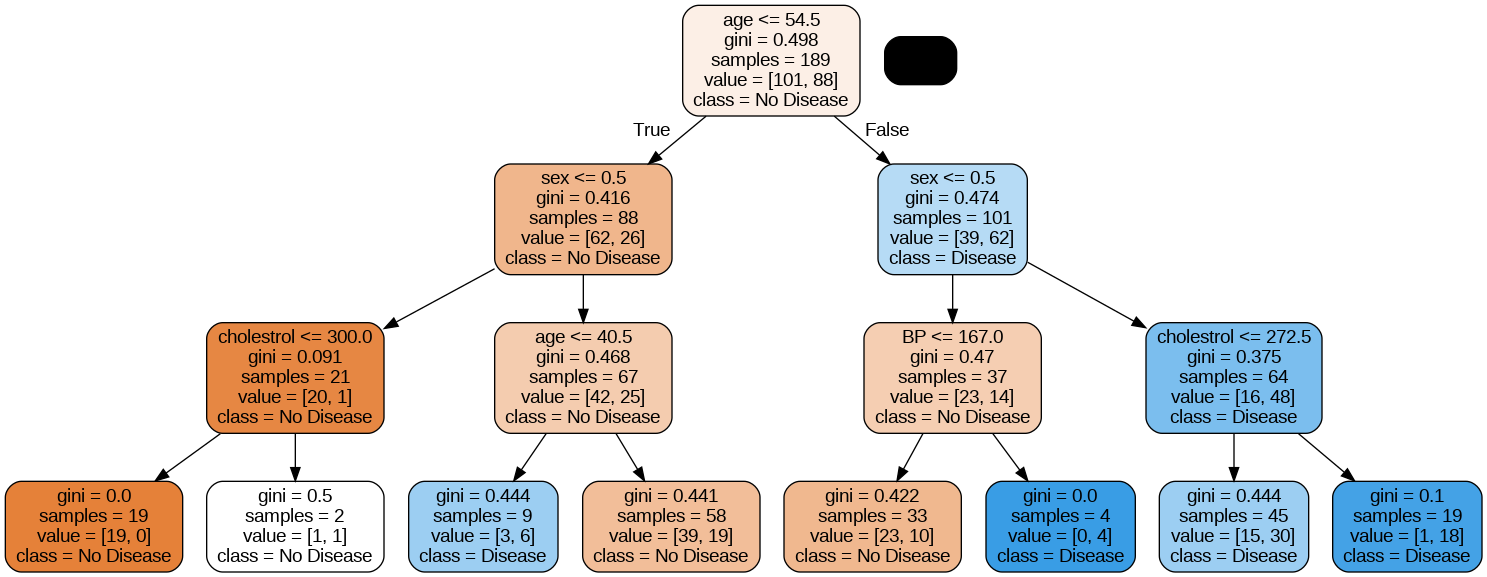

In [21]:
# plotting tree with max_depth 3
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, feature_names = X.columns, class_names = ['No Disease', 'Disease'] )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluating model performance

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [19]:
print('Training accuracy', accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

Training accuracy 0.7407407407407407


array([[82, 19],
       [30, 58]])

In [20]:
print('Testing accuracy', accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Testing accuracy 0.6049382716049383


array([[35, 14],
       [18, 14]])


### Random Forest

In [22]:
def get_dt_graph(dt_classifier):
  dot_data = StringIO()

  export_graphviz(dt_classifier, out_file = dot_data, filled = True, rounded = True, feature_names = X.columns, class_names = ['No Disease', 'Disease'] )

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  Image(graph.create_png())
  return graph

In [48]:
def evaluate_model(dt_classifier):
  print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
  print("Train Confusion Matrix:")
  print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
  print("-"*50)
  print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
  print("Test Confusion Matrix:")
  print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
  print("-"*50)
  print(classification_report(y_test, dt_classifier.predict(X_test)))

In [23]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators = 5, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=42)

In [25]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

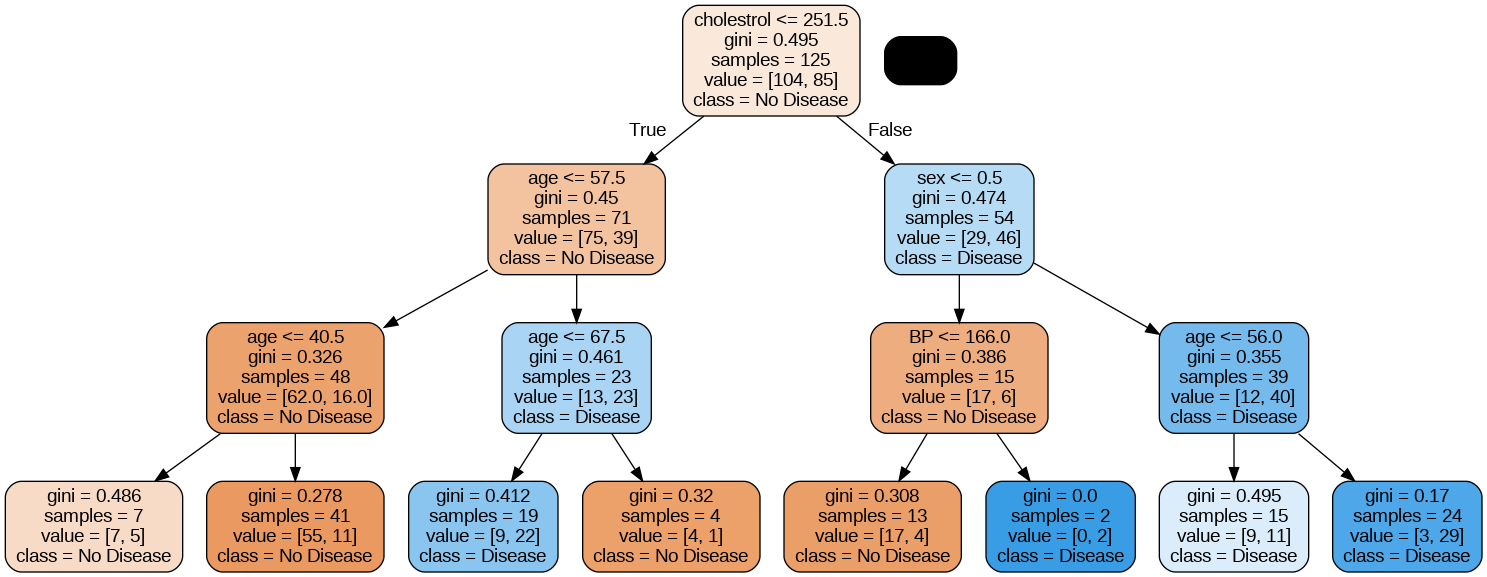

In [37]:
gph = get_dt_graph(dt_classifier=rf.estimators_[0])
Image(gph.create_png(), width=1000, height=700)

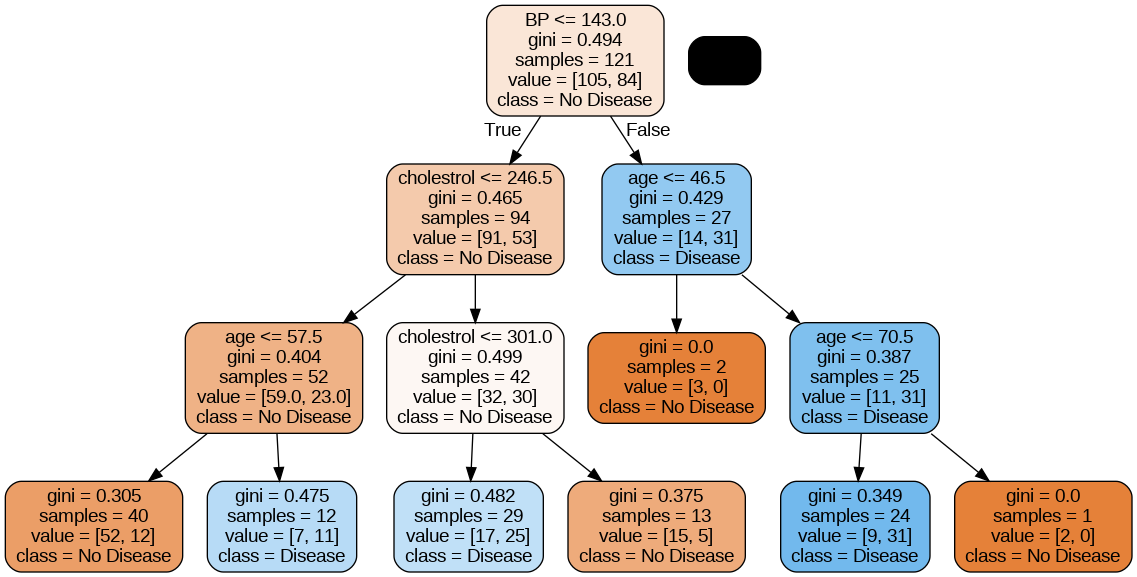

In [29]:
gph = get_dt_graph(dt_classifier=rf.estimators_[1])
Image(gph.create_png(), width=1000, height=700)

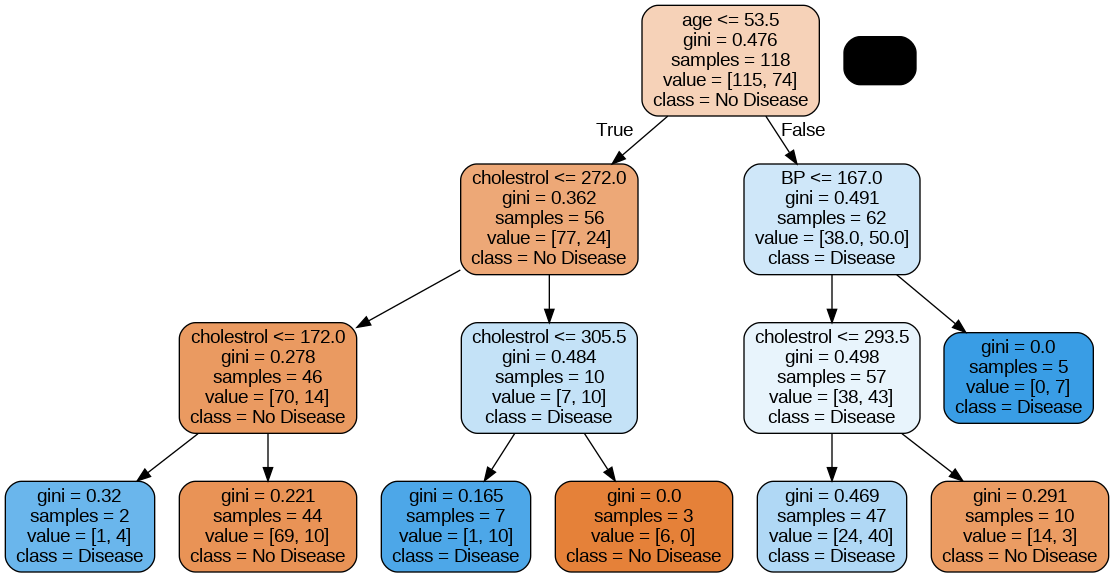

In [30]:
gph = get_dt_graph(dt_classifier=rf.estimators_[2])
Image(gph.create_png(), width=1000, height=700)

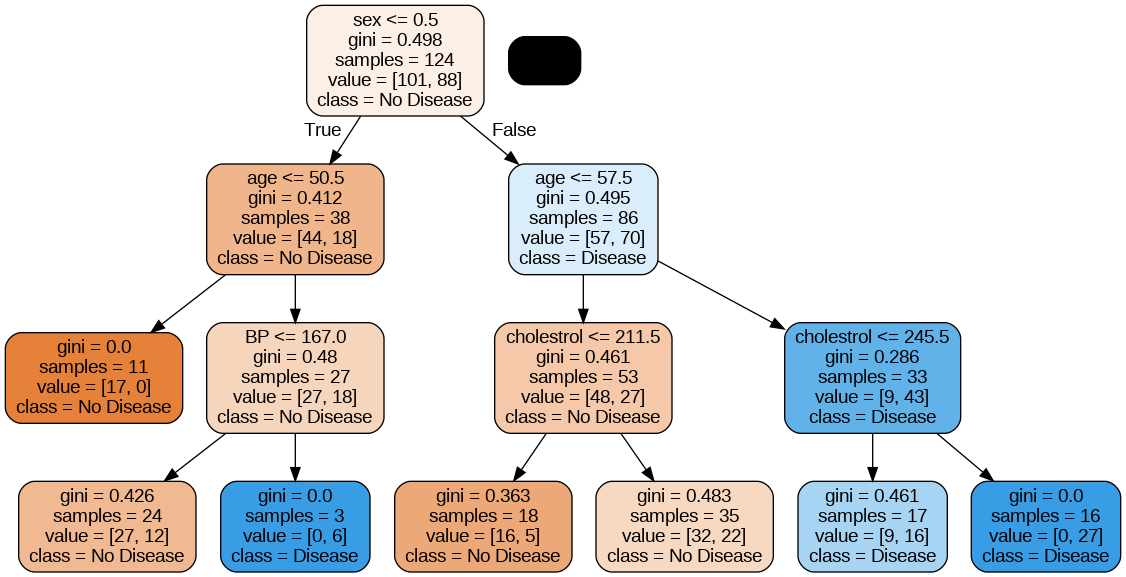

In [31]:
gph = get_dt_graph(dt_classifier=rf.estimators_[3])
Image(gph.create_png(), width=1000, height=700)

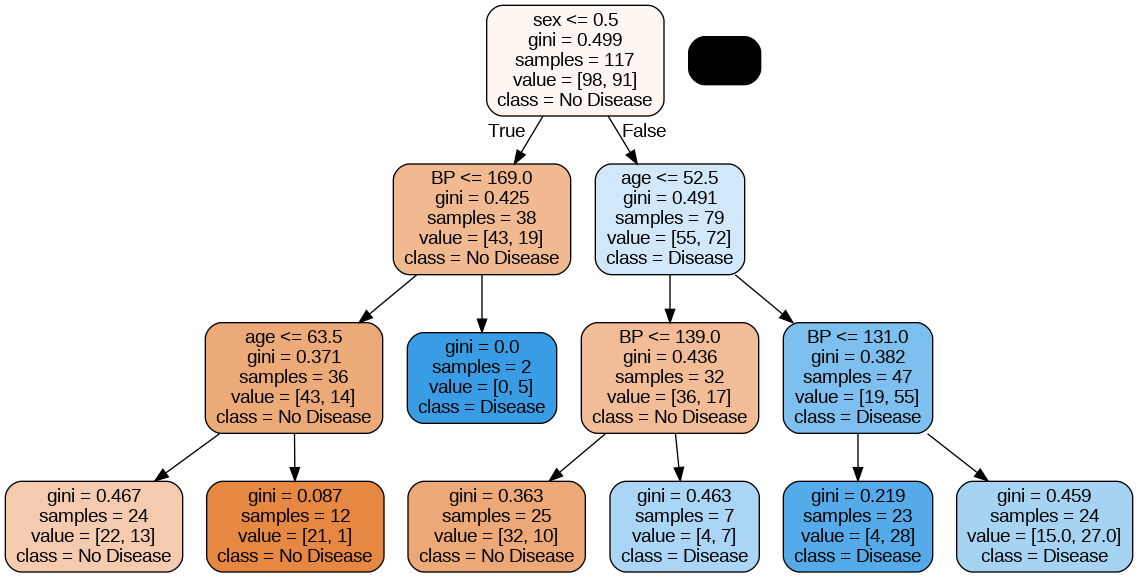

In [32]:
gph = get_dt_graph(dt_classifier=rf.estimators_[4])
Image(gph.create_png(), width=1000, height=700)

In [49]:
score1 = evaluate_model(rf.estimators_[0])

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[74 27]
 [26 62]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[34 15]
 [15 17]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        49
           1       0.53      0.53      0.53        32

    accuracy                           0.63        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.63      0.63      0.63        81



In [50]:
score2 = evaluate_model(rf.estimators_[1])

Train Accuracy : 0.6666666666666666
Train Confusion Matrix:
[[61 40]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.48148148148148145
Test Confusion Matrix:
[[21 28]
 [14 18]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        49
           1       0.39      0.56      0.46        32

    accuracy                           0.48        81
   macro avg       0.50      0.50      0.48        81
weighted avg       0.52      0.48      0.48        81



In [51]:
score3 = evaluate_model(rf.estimators_[2])

Train Accuracy : 0.6878306878306878
Train Confusion Matrix:
[[67 34]
 [25 63]]
--------------------------------------------------
Test Accuracy : 0.5185185185185185
Test Confusion Matrix:
[[23 26]
 [13 19]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        49
           1       0.42      0.59      0.49        32

    accuracy                           0.52        81
   macro avg       0.53      0.53      0.52        81
weighted avg       0.55      0.52      0.52        81



In [52]:
score4 = evaluate_model(rf.estimators_[3])

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[89 12]
 [44 44]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[41  8]
 [22 10]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        49
           1       0.56      0.31      0.40        32

    accuracy                           0.63        81
   macro avg       0.60      0.57      0.57        81
weighted avg       0.61      0.63      0.60        81



In [53]:
score5 = evaluate_model(rf.estimators_[4])

Train Accuracy : 0.708994708994709
Train Confusion Matrix:
[[71 30]
 [25 63]]
--------------------------------------------------
Test Accuracy : 0.6666666666666666
Test Confusion Matrix:
[[34 15]
 [12 20]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.69      0.72        49
           1       0.57      0.62      0.60        32

    accuracy                           0.67        81
   macro avg       0.66      0.66      0.66        81
weighted avg       0.67      0.67      0.67        81



Conclusion

We can see the Train accuracy and Test Accuracy scores are better off in Random Forest Model no. 5. It also has the highest Recall% which is 62%.
Hence we will go ahead with that model.